<a href="https://colab.research.google.com/github/MatheusOrange211/Bootcamp-Alura/blob/main/1-super-desafio-Matheus-Naranjo-Correa-Projeto-covid-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size='10px'>**Dataset Covid-19 / Brasil.io**<br></font>
> **Autor: Matheus Naranjo Corrêa**

- [linkedIn](https://www.linkedin.com/in/matheus-naranjo-35ab22188/)
- [Github](https://github.com/MatheusOrange211)

#**Resumo** 📚

>Neste notebook vamos analisar como ocorreu a distribuição da **COVID-19** nos estados brasileiros, analisando os seguintes pontos:
* Como foi a distribuição de casos nos Estados Brasileiros
* Estados com maior número de casos confirmados
* Percentual de mortes por casos confirmados em cada Unidade Federativa
* Como foi a distribuição de óbitos nos Estados Brasileiros
* Estados com maior número de óbitos
* Percentual de óbitos por casos confirmados
* Analisar casos confirmados e óbitos nas regiões brasileiras
* Porcentagem de casos confirmados referente a população das UF
* Analisando um pouco o estado de Roraima (Menor estado do Brasil)
* Analisando um pouco o estado de São Paulo (Maior estado do Brasil)

<font color='red'>**Nota**</font>: Nosso dataset vai de 25-02-2020 até 05-11-2020. Algumas informações nele já estarão desatualizadas, contudo, a lógica de desenvolvimento e entendimento continuam valendo. Bons estudos!

#**Análise de dados** 📚

>Primeiramente, vamos instalar o **bar_chart_race**. Esta biblioteca nos ajudará a criar gráficos animados, tornando o entendimento mais fácil e até mesmo mais interessante  👌🏻 👌🏻 👌🏻 

In [ ]:
!pip install bar_chart_race

     |████████████████████████████████| 163kB 9.1MB/s 


>Importando as bibliotecas que utilizaremos neste notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import numpy as np
from matplotlib import ticker
import seaborn as sns
import bar_chart_race as bcr

>Vamos então, importar nosso dataset 'casos.csv', que contém as informações referentes a covid-19. Eis aqui, as informações que cada coluna possue as seguites informações:

* date----------------------------------Data
* state---------------------------------UF	(Unidade federativa)
* city-----------------------------------Município
* place_type------------------------Se o dado é referente ao município ou ao estado
* confirmed-------------------------Quantidade de casos confirmados
* deaths------------------------------Quantidade de mortes
* is_last------------------------------	É a última atualização?
* estimated_population------População estimada para o local em 2020, segundo o IBGE
* estimated_population_2019---------População estimada 2019, segundo IBGE
* city_ibge_code-----------------Código IBGE do município ou estado
* confirmed_per_100k_inhabitants-------Casos confirmados por 100.000 habitantes
* death_rate -----------------------Mortes por casos confirmados
* order_for_place-----------------Ordenação para esse local



In [ ]:
dados = pd.read_csv('/content/caso.csv',encoding='utf-8',sep=',',engine='python')
dados['city_ibge_code'] = dados['city_ibge_code'].astype("string")
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


>Formatamos então nossos valores numéricos para o tipo float

In [ ]:
pd.options.display.float_format = "{:.2f}".format

##Como foi a distribuição de casos nos Estados Brasileiros? <br>
> Queremos saber o seguinte, como foi que a Covid-19 afetou os estados brasileiros?

>Primeiro, para não afetar nosso dataset original, vamos criar uma nova variável para armazenar os dados, depois vamos usar o **.drop()** e _droparemos_ as colunas que não possuímos o interesse de utilizar.

In [ ]:
organizado_por_estados_dados_incompletos = dados
organizado_por_estados_dados_incompletos = organizado_por_estados_dados_incompletos.drop(['order_for_place','is_last','estimated_population_2019',
                                                                                          'estimated_population','city_ibge_code',
                                                                                          'confirmed_per_100k_inhabitants','death_rate','place_type',
                                                                                          'city'],axis=1)

>Entretanto, ainda a questão dos dados faltantes.Substituiremos os nossos **NaN** por zero, com a ajuda do **.fillna()**, passando zero para ser posto no lugar, entretanto, poderíamos por uma equação ou algum método mais avançado (e fora do conhecimento atual) para substituir os dados faltantes.

In [ ]:
organizado_por_estados_dados_incompletos = organizado_por_estados_dados_incompletos.fillna(0)
organizado_por_estados_dados_incompletos = organizado_por_estados_dados_incompletos.drop_duplicates(['state'])
organizado_por_estados_dados_incompletos.info() #informações do que cada coluna possui, seu comprimento e uso de memória
organizado_por_estados_dados_incompletos.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 821973
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       27 non-null     object
 1   state      27 non-null     object
 2   confirmed  27 non-null     int64 
 3   deaths     27 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


,date,state,confirmed,deaths
0,2020-11-05,AC,31248,697
4247,2020-11-03,AP,52832,751


>Com a ajuda do **.groupby()**, passando a coluna 'state' como o grupo do groupby, cujo o qual se tornará o index deste dataframe ("tabela" que estamos usando). Ainda aplicaremos o **.sum()** para realizar o somatório dos valores com index iguais. Isso nos ajudará a reduzir as milhares de linhas que temos (821973). Depois então, a partir da coluna **confirmed** , faremos a ordenação dos valores em modo decrescente. Ajustamos nosso eixo-y e adicionamos um limites a este eixo, fazendo com que os dados fiquem apresentados de forma correta.

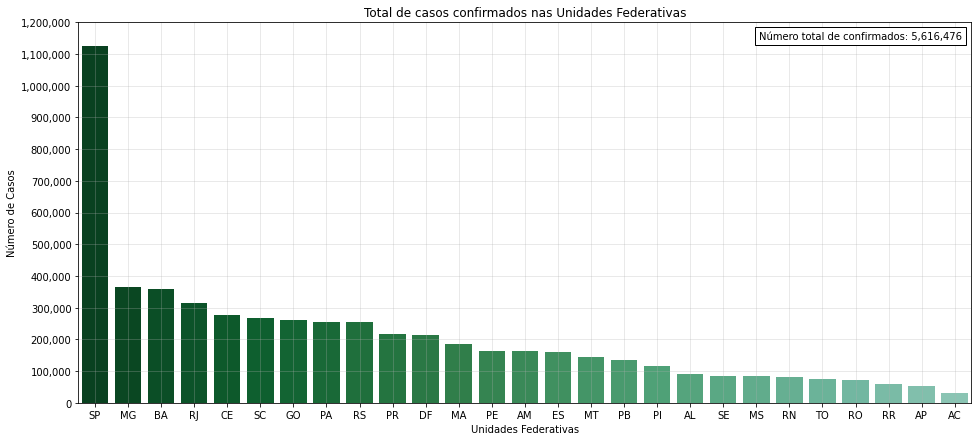

In [ ]:
estados_confirmados = organizado_por_estados_dados_incompletos.groupby(['state']).sum()
estados_confirmados = estados_confirmados.sort_values(by='confirmed',ascending=False)

plt.figure(figsize=(16,7))
grafico_estados_confirmados = sns.barplot(x=estados_confirmados.index,
                                          y= estados_confirmados['confirmed'],
                                          palette= sns.color_palette("BuGn_r", n_colors=len(estados_confirmados['confirmed']) +20))
grafico_estados_confirmados.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
grafico_estados_confirmados.yaxis.set_ticks(np.arange(0, 1210000,100000)) #modificar o eixo y no que tange ao intervalo de valores,deixando melhor pra entender

#forma de adicionar textos dentro do gráfico. No caso, este método é o texto em posição ancorada. Não temos muita liberdade movimentação
ancora = AnchoredText(f"Número total de confirmados: {estados_confirmados['confirmed'].sum():,.0f}",loc='upper right')
grafico_estados_confirmados.add_artist(ancora)

plt.grid('gray',alpha=0.35)
plt.ylim(0,1200000)
plt.ylabel('Número de Casos')
plt.xlabel("Unidades Federativas")
plt.title("Total de casos confirmados nas Unidades Federativas")
plt.show()

> O que temos?
* Eixo y: Temos o número de casos
* Eixo x: Unidades Federativas
* **Interpretação**: Notamos que o estado de São Paulo é o estado com maior número de casos confirmados, ultrapassando a marca de 1 Milhão de Infectados. Em segundo lugar nós temos o estado de Minas Gerais. Podemos notar que a diferença é absurdamente grande, sendo 761.395 mil infectados de diferença entre um estado e outro. Em último lugar, temos o estado do Acre, com um total de 31.248 infectados.


##Estados com maiores números de infectados

>Vamos então ver os estados com maiores casos confirmados,apenas para termos um entendimento maior.

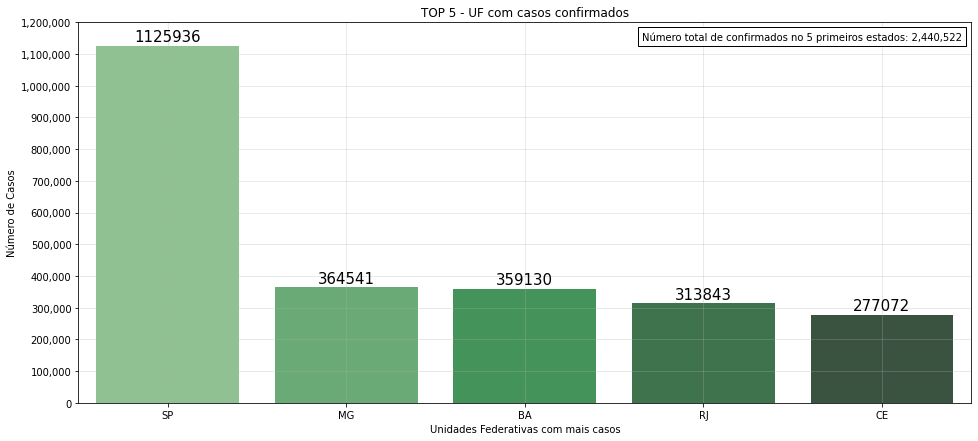

In [ ]:
plt.figure(figsize=(16,7))
grafico_estados_confirmados_primeiros = sns.barplot(x=estados_confirmados.index[:5],
                                          y= estados_confirmados['confirmed'].head(5),
                                          palette= sns.color_palette("Greens_d", n_colors=len(estados_confirmados['confirmed'].head(5) + 10)))
grafico_estados_confirmados_primeiros.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
grafico_estados_confirmados_primeiros.yaxis.set_ticks(np.arange(0,1210000,100000))
for p in grafico_estados_confirmados_primeiros.patches:                                       #laço for que pega a variável que contém nosso gráfico. Com ajuda do patches
                                                                                    #realizaremos alguns ajustes                        
  grafico_estados_confirmados_primeiros.annotate(format(p.get_height(), '.0f'),               #para os valores do gráfico, formataremos o valor númerico
                   (p.get_x() + p.get_width() / 2, p.get_height()),                 #pegaremos o eixo de cada barra, somamos pela divisão da largura da barra por 2 e add na altura
                   ha = 'center', va = 'center',                                    #adicionamos os valores com horizontal Align == centro e Vertical Align == Centro
                   size=15,                                                         #tamanho dos números
                   xytext = (0,9),                                                  #posicionamento dos nosso números (no caso, acima da barra, caso queira dentro, use (0,-12))
                   textcoords = 'offset points')                                    #textcoords no ajuda a fazer o deslocamento dos valores, por padrão usamos offset points

#forma de adicionar textos dentro do gráfico. No caso, este método é o texto em posição ancorada. Não temos muita liberdade movimentação
ancora = AnchoredText(f"Número total de confirmados no 5 primeiros estados: {estados_confirmados['confirmed'].head(5).sum():,.0f}",loc='upper right')
grafico_estados_confirmados_primeiros.add_artist(ancora)

plt.grid('gray',alpha=0.35)
plt.ylim(0,1200000)
plt.ylabel('Número de Casos')
plt.xlabel("Unidades Federativas com mais casos")
plt.title("TOP 5 - UF com casos confirmados")

plt.show()

>**Interpretação**: E como já dito mais acima, o estado de São Paulo possui uma diferença muito grande em comparação a Minas Gerais, sendo em cerca de 3 vezes maior.

##Percentual de Casos confirmados por população em cada Unidade Federativa
>Vamos entender melhor como foi a distribuição dos casos em cada UF e ver se o estado que mais teve casos confirmados também foi o com a maior taxa de contaminados, referente a sua população

>Primeiro, puxo do dataset original para não causar nenhuma interferência entre outros dataframes e também para que o entendimento seu, caro leitor(a), seja melhor. Removemos as colunas que não utilizaremos e filtramos a coluna **place_type** pelos campos que possuem 'state' apenas.

In [ ]:
pop_estimed = dados.drop(['order_for_place',
                       'death_rate','is_last','city'],axis=1)
estados_filtro = pop_estimed['place_type'] =='state'
pop_estimed = pop_estimed[estados_filtro]

>Removemos os campos que contém duplicadas. Isso reduzirá o tamanho de nosso dataset, deixando apenas os dados que realmente serão importantes, entretanto, não se preocupe, estamos indo no caminho certo. 

In [ ]:
 pop_estimed = pop_estimed.drop_duplicates(['state'])

Criamos uma coluna para armazenar a divisão dos casos confirmados pelo valor da população estimada para 2020, depois ordenamos de maneira decrescente. Queremos saber como ficou a contaminação em cada estado, e quantos por cento foram infectados, com base em nossas estimativas.

In [ ]:
pop_estimed['confirmed_per_pop'] = pop_estimed['confirmed']/ pop_estimed['estimated_population']
pop_estimed = pop_estimed.sort_values(by='confirmed_per_pop',ascending=False)

>Configuramos nosso plot e ...

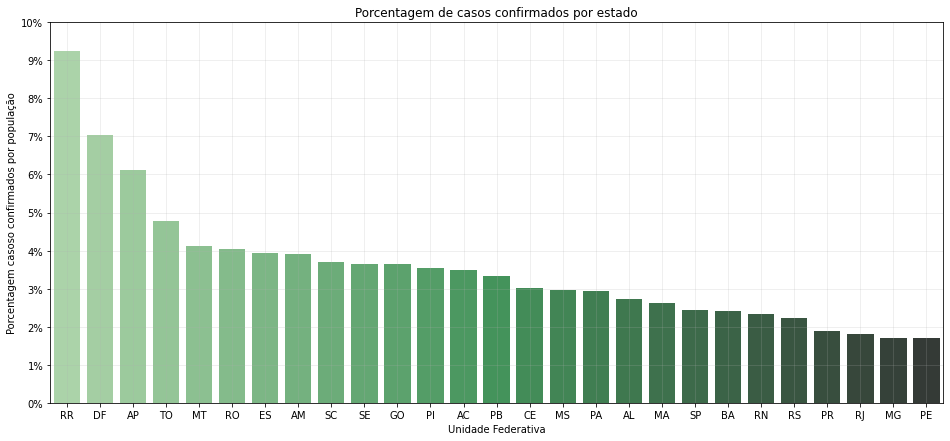

In [ ]:
plt.figure(figsize=(16,7))

grafico_confirmed_pop = sns.barplot(x= pop_estimed['state'],y=(pop_estimed['confirmed_per_pop'])*100,palette='Greens_d')
grafico_confirmed_pop.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))
grafico_confirmed_pop.yaxis.set_ticks(np.arange(0, 11,1)) #modificar o eixo y no que tange ao intervalo de valores

plt.grid('grey',alpha=0.25)
plt.ylim(0,10)
plt.ylabel("Porcentagem casoso confirmados por população")
plt.xlabel("Unidade Federativa")
plt.title('Porcentagem de casos confirmados por estado')
plt.show()

>**Interpretação**: Notamos que Roraima  (melhor estado de todos da região norte 😎) teve uma taxa superior a 9%. O porquê disso?bem, se levarmos em conta que sua população é a menor do país, representando apenas 0,3% da população nacional (+ 600 mil hab.), entederemos o porquê de sua taxa ser alta, mesmo ela estando, em números brutos, nas últimas colocações do comparativo entre estados de casos confirmados.
Por outro lado, a taxa de casos confirmados em Pernambuco foi a menor, não ultrapassando 2% de casos. Contudo, fiquemos de olho em Pernambuco, pois se por um lado, o estado teve poucos casos confirmados, por outro, teve uma taxa de mortes altíssima para a sua população, como veremos mais abaixo, assim como o estado do Ceará, que neste nosso gráfico,  teve uma taxa de casos confirmados mediana (superior a 3%), mas um número e taxa de mortes alta também e comparação a sua população total.

##Como foi a distribuição de óbitos nos Estados Brasileiros
>Vamos então ver como foi o comportamento das Unidades Federativas quanto ao número de óbitos e verificar se os estados com maior número de casos confirmados também foram os com maior número de óbitos.

>Primeiramente, ordenamos nossos dados agora pelo número de mortes (ordem decrescente) e adicionamos a uma variável. Depois plotamos nosso gráfico, lembrando sempre de arrumar o eixo-y no que tange aos limites, que sempre devem iniciar de zero.

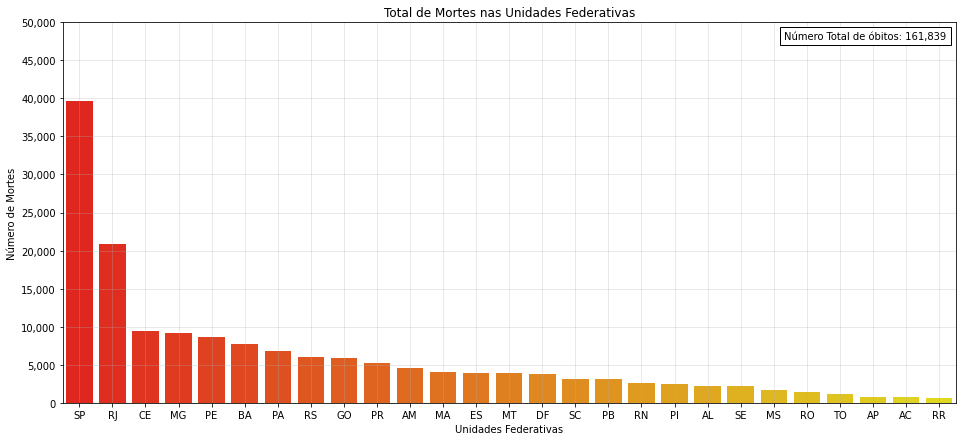

In [ ]:
estados_mortes = estados_confirmados.sort_values(by='deaths',ascending=False)
plt.figure(figsize=(16,7))

grafico_estados_obitos = sns.barplot(x=estados_mortes.index,
            y= estados_mortes['deaths'],
            palette= sns.color_palette("autumn", n_colors=len(estados_mortes['deaths'] )))

grafico_estados_obitos.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
grafico_estados_obitos.yaxis.set_ticks(np.arange(0,60000,5000))

#forma de adicionar textos dentro do gráfico. No caso, este método é o texto em posição ancorada. Não temos muita liberdade movimentação
anc = AnchoredText(f"Número Total de óbitos: {estados_mortes['deaths'].sum():,.0f}",loc='upper right')
grafico_estados_obitos.add_artist(anc)

plt.grid('gray',alpha=0.35)
plt.ylim(0,50000)
plt.ylabel('Número de Mortes')
plt.xlabel('Unidades Federativas')
plt.title("Total de Mortes nas Unidades Federativas")
plt.show()

>Temos que:
* Eixo-y: Número de Mortes
* Eixo-x: Unidades Federativas
* **Interpretação**: temos então que a distribuição de mortes maior foi a do estado de São Paulo e a menor, a de Roraima. São Paulo, até a data mais recente deste dataset, ainda não havia ultrapassado a casa dos 400 mil casos. Logo atrás temos o Rio de Janeiro. Podemos concluir então que os estados com maiores casos confirmados, também são os que mais tiveram óbitos confirmados. Contudo, devemos destacar que Ceará e Pernambuco, que não estão entre 5 primeiros com mais infectados, estão, neste caso entre os com maior número de mortes.

>Contudo, vamos ver mais de perto o comportamento dos 5 estados com maior número de óbitos e entender mais essa diferença entre eles, para que o nosso entendimento seja completo.

##Estados com maior número de óbitos
>Façamos o plot de nosso gráfico

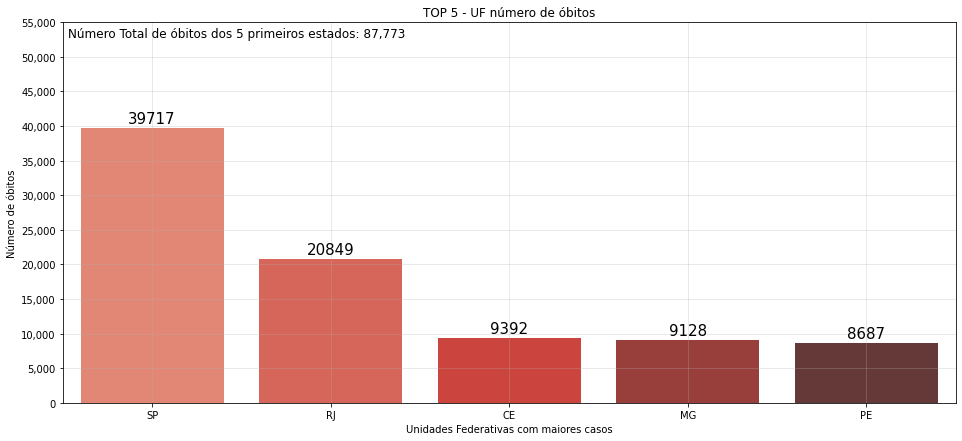

In [ ]:
plt.figure(figsize=(16,7))
grafico_estados_obitos_primeiros = sns.barplot(x=estados_mortes.index[:5],
                                          y= estados_mortes['deaths'].head(5),
                                          palette= sns.color_palette("Reds_d", n_colors=len(estados_confirmados['deaths'].head(5) + 10)))
grafico_estados_obitos_primeiros.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
grafico_estados_obitos_primeiros.yaxis.set_ticks(np.arange(0,60000,5000))

for p in grafico_estados_obitos_primeiros.patches:                                       
  grafico_estados_obitos_primeiros.annotate(format(p.get_height(), '.0f'),               
                   (p.get_x() + p.get_width() / 2, p.get_height()),                 
                   ha = 'center', va = 'center',                                    
                   size=15,                                                         
                   xytext = (0,9),                                                  
                   textcoords = 'offset points')  

#Texto adicionado dentro nosso gráfico, com o método de texto com deslocamento. Passamos mais parâmetros, mas também temos mais liberdade de customizar
grafico_estados_obitos_primeiros.annotate(f"Número Total de óbitos dos 5 primeiros estados: {estados_mortes['deaths'].head(5).sum():,.0f}",
                    xy=(0,1),
                    size =12,
                    xycoords="axes fraction",
                    xytext=(5,-5),
                    textcoords="offset points",
                    ha="left", va="top")

plt.grid('gray',alpha=0.35)
plt.ylim(0,55000)
plt.ylabel('Número de óbitos')
plt.xlabel("Unidades Federativas com maiores casos")
plt.title("TOP 5 - UF número de óbitos")
                                 
plt.show()

>Notamos então um dados interessante. Tanto o Ceará quanto Pernambuco, que no nosso gráfico de casos confirmados, encontravam-se mais ao meio, neste, de número de óbitos, ficaram entre os 5 primeiros. Podemos então pensar que o percentual de mortes nos estados nordestinos foram altos. Vamos então analisar melhor a questão do percentual de mortes nas unidades federativas para verificar se esta hipótese está correta.

##Percentual de mortes por casos confirmados em cada Unidade Federativa
>Vamos verificar então, como se distribuiu o percentual, e verificar se a nossa hipótese está correta.<br> Primeiro,criemos uma variável que armazenar os resultados dos óbitos pelos casos confirmados. Ordenamos de forma decrescente, para uma melhor análise, e depois plotamos nosso gráfico. 

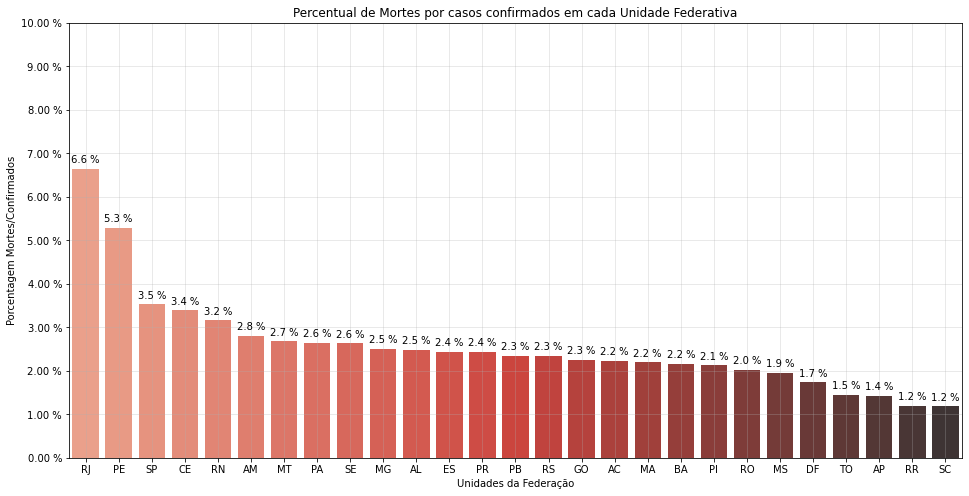

In [ ]:
morte_por_confirmados = (estados_mortes['deaths'] / estados_mortes['confirmed'])*100
morte_por_confirmados = morte_por_confirmados.sort_values(ascending=False)

plt.figure(figsize=(16,8))
grafico_morte_por_confirmados = sns.barplot(x = morte_por_confirmados.index,
                                            y= morte_por_confirmados,
                                            palette= sns.color_palette("Reds_d", n_colors=len(morte_por_confirmados)))
grafico_morte_por_confirmados.yaxis.set_ticks(np.arange(0,11,1))
grafico_morte_por_confirmados.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} %'))

for p in grafico_morte_por_confirmados.patches:
  grafico_morte_por_confirmados.annotate(format(p.get_height(),".1f") + " %",
                                        (p.get_x() + p.get_width()/2, p.get_height()),
                                         xytext = (0,9),
                                         ha='center',va='center',
                                         textcoords='offset points')

plt.grid('gray',alpha=0.35)
plt.ylim(0,10)
plt.ylabel("Porcentagem Mortes/Confirmados")
plt.xlabel("Unidades da Federação")
plt.title("Percentual de Mortes por casos confirmados em cada Unidade Federativa")
plt.show()

>O que temos?
* Eixo-y: Porcentagem Mortes/confirmados para cada UF
* Eixo-x: UF
* **Interpretação**: Aqui, temos uma grande mudança nas primeiras posicões. SP, que liderava tanto no no número de casos confirmados como no de mortes, agora encontra-se na terceira posição, com uma taxa em torno de 3,5%. Isso deve, é claro, pelo tamanho de sua população( + 12 Milhões). Já o Rio de Janeiro, teve uma percentual maior que 6%. Como suspeitávamos, em Pernambuco, a taxa foi superior que a de São Paulo e daí podemos concluir que, um pernambucano que tenha contraído a doença, tem 5.3% de chance de falecer, isso é claro, se não contarmos com outros fatores, como, se ele pertence ao grupo de risco, se trabalha diretamente no atendimento de pessoas com covid, dentre outros. O estado de Roraima e o de Santa Catarina ficaram com as menores taxas de letalidade (cerca de 1.2%).

##Número de casos por Regiões

>Entendido como a covid-19 está atuando em cada estado, vamos agora entender como está o comportamento de cada região. Primeiro, copiamos do dataset original para não gerarmos problemas de entendimento. Dropamos o que não utilizaremos aqui.

In [ ]:
dados_por_regiao = dados
dados_por_regiao = dados_por_regiao.drop(['order_for_place','estimated_population_2019','estimated_population','confirmed_per_100k_inhabitants',
                       'death_rate','is_last','city'],axis=1)

>Para entender melhor a situação, vamos nos focar nos estaods,filtrando então na coluna place_type.

In [ ]:
apenas_estados = dados_por_regiao['place_type'] == 'state'
apenas_estados = dados_por_regiao[apenas_estados]

>Adicionamos date como nosso index

In [ ]:
apenas_estados = apenas_estados.set_index("date")

>Logo depois, criamos uma nova variável que contém os estaodos e o somatório de mortes e casos confirmados. O que queremos aqui é preparar nosso dataframe para receber o ibge_code e ordenar tudo direitinho.

In [ ]:
ibge_code = apenas_estados.groupby(['state','city_ibge_code'])[['confirmed','deaths']].sum()

>Juntamos nossas tabelas, removemos colunas que não precisaremos e colocamos o ibge_code como nosso index.

In [ ]:
estados_com_cod = pd.merge(estados_confirmados,ibge_code,left_index=True,right_index=True)
estados_com_cod = estados_com_cod.drop(['confirmed_y','deaths_y'],axis=1)
estados_com_cod = estados_com_cod.rename(columns={'confirmed_x':'confirmed','deaths_x':'deaths'})
estados_com_cod= estados_com_cod.reset_index('state')

In [ ]:
estados_com_cod = estados_com_cod[['confirmed','deaths']].astype(float)

>Feito isso, podemos pegar do index de cada linha, o primeiro caracter que, com a ajuda do regioes_map( nosso dicionário que contem o nome de cada regiao) e da função built-in *map*, irá por o nome de cada região que os estados percentam, tudo isso na nossa coluna region.

In [ ]:
estados_com_cod['region'] = estados_com_cod.index.str[0]
regioes_map = {1:"Norte",2:"Nordeste",3:"Sudeste",4:"Sul",5:"Centro-Oeste"}
estados_com_cod['region'] = estados_com_cod['region'].map(lambda x: regioes_map[int(x)])


>Damos um groupby para somar os valores de todas as regiões (norte com norte, nordeste com nordeste, etc). Ordenamos em crescente e plotamos tanto a coluna de casos confirmados quanto a de mortes.

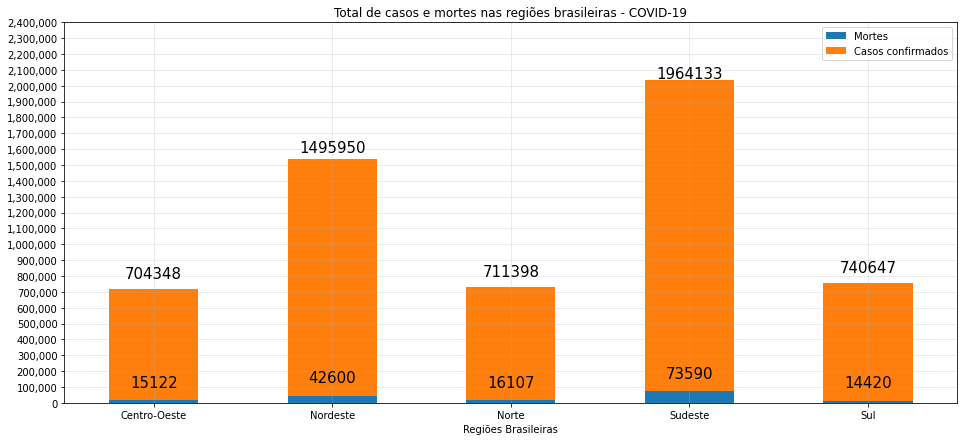

In [ ]:
total_regioes_brasil = estados_com_cod.groupby('region').sum()
# total_regioes_brasil = total_regioes_brasil.sort_values(by=['confirmed'],ascending=False)

grafico_total_regioes_brasil = total_regioes_brasil[['deaths','confirmed']].plot(kind='bar',figsize=(16,7),stacked=True)
grafico_total_regioes_brasil.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
grafico_total_regioes_brasil.yaxis.set_ticks(np.arange(0,2500000,100000))

for p in grafico_total_regioes_brasil.patches:
  grafico_total_regioes_brasil.annotate(format(p.get_height(), ".0f"),
  (p.get_x() + p.get_width() / 2, p.get_height()),
  ha = 'center', va = 'center',
  size=15,
  xytext = (0,18),
  textcoords = 'offset points',)

plt.xticks(rotation=0)
plt.xlabel("Regiões Brasileiras")
plt.title("Total de casos e mortes nas regiões brasileiras - COVID-19")
plt.legend(['Mortes','Casos confirmados'])
plt.grid(alpha=0.3)

>**Interpretação**: Temos então as informações de casos e óbitos nas regiões. O sudeste, possui não só o maior número de contaminados (chegando quase na marca de 2 Milhões) como também possui o maior número de óbitos. Logo atrás, temos o nordeste, com aproximadamente 1,5 Milhão de casos confirmados, depois a região Sul (750 Mil), norte e centro-oeste com valores próximos um do outro (abaixo de 750 Mil) .

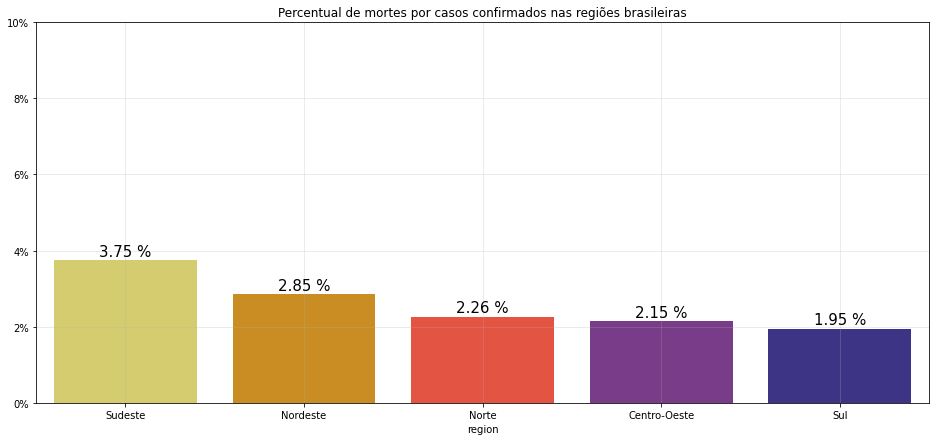

In [ ]:
percentual_regioes = (total_regioes_brasil['deaths']/total_regioes_brasil['confirmed'])*100
percentual_regioes = percentual_regioes.sort_values(ascending=False)

plt.figure(figsize=(16,7))
grafico_percentual_regioes = sns.barplot(x=percentual_regioes.index,
                                         y=percentual_regioes.values,
                                         palette=sns.color_palette('CMRmap_r',
                                         n_colors =len(percentual_regioes)))

grafico_percentual_regioes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))

for p in grafico_percentual_regioes.patches:
  grafico_percentual_regioes.annotate(format(p.get_height(), ".2f") +" %",
                                      (p.get_x() + p.get_width()/2,p.get_height()),
                                      ha='center',va='center',
                                      size=15,
                                      xytext=(0,9),
                                      textcoords= 'offset points')

plt.grid(alpha=0.3)
plt.xticks(rotation=0)
plt.ylim(0,10)
plt.title("Percentual de mortes por casos confirmados nas regiões brasileiras")
plt.show()

>**Interpretação**: A região sudeste uma taxa de 3.75% de contaminados. Se levarmos em conta o total de pessoas que moram nesta região (+80 Milhões), temos então, a informação que quase 3,2 Milhões de pessoas já foram contaminadas. O curioso é que em números totais, o sul tem a menor taxa de casos confirmados, apesar de ser a terceira região com maior número de casos.

##Bar_chart_race - Timeline casos confirmados e óbitos nas Unidades Federativas
>Vamos analisar de maneira mais interessante, a evolução da covid-19 ao longo do tempo nos estados brasileiros, tanto no número de confirmados quanto no de mortos.

In [ ]:
dados_por_tempo = dados
dados_por_tempo =dados_por_tempo.drop(['order_for_place','estimated_population_2019','estimated_population','confirmed_per_100k_inhabitants',
                       'death_rate','is_last','city','city_ibge_code'],axis=1)
dados_estados = dados_por_tempo['place_type']=='state'
dados_por_tempo = dados_por_tempo[dados_estados]
dados_por_tempo = dados_por_tempo.fillna(0)

###Timeline gráfico Mortes Confirmadas de Covid-19 (bar_chart_race)
>Para evitar a demora para processamento do vídeo, você pode ver ele [aqui](https://drive.google.com/file/d/1svIEs_APunNXj0SivgGBNVt9VOCpmI5y/view?usp=sharing).

In [ ]:
# dados_por_tempo = dados_por_tempo.fillna(0)
dados_por_tempo_confirmado = dados_por_tempo.pivot(index='state',columns='date',values='confirmed')
dados_por_tempo_confirmado = dados_por_tempo_confirmado.fillna(0)
dados_por_tempo_confirmado = dados_por_tempo_confirmado.drop(['2020-11-04','2020-11-05'],axis=1)
dados_por_tempo_confirmado

date,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00,4.00,7.00,11.00,11.00,17.00,21.00,23.00,23.00,25.00,25.00,34.00,41.00,42.00,43.00,45.00,46.00,46.00,...,27710.00,27859.00,27874.00,27885.00,28030.00,28222.00,28409.00,28555.00,28662.00,28672.00,28687.00,28805.00,28818.00,28834.00,29017.00,29031.00,29050.00,29063.00,29272.00,29301.00,29406.00,29598.00,29693.00,29718.00,29765.00,29865.00,29925.00,30028.00,30121.00,30217.00,30304.00,30317.00,30380.00,30545.00,30638.00,30758.00,30796.00,30951.00,30954.00,30962.00
AL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,4.00,6.00,7.00,7.00,8.00,10.00,11.00,11.00,12.00,14.00,17.00,17.00,18.00,18.00,18.00,23.00,23.00,...,85937.00,86124.00,86294.00,86393.00,86549.00,86879.00,87504.00,87750.00,87928.00,88098.00,88135.00,88283.00,88426.00,88538.00,88653.00,88790.00,88826.00,88880.00,88954.00,89082.00,89192.00,89278.00,89365.00,89493.00,89528.00,89644.00,89746.00,89847.00,89994.00,90124.00,90177.00,90254.00,90384.00,90497.00,90564.00,90671.00,90789.00,90820.00,90918.00,91016.00
AM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,2.00,3.00,7.00,11.00,26.00,32.00,47.00,54.00,67.00,81.00,111.00,140.00,151.00,175.00,200.00,229.00,260.00,311.00,...,135205.00,136169.00,136416.00,136708.00,137964.00,139326.00,140240.00,141199.00,142137.00,142382.00,142573.00,143571.00,144492.00,145367.00,146233.00,147038.00,147457.00,147465.00,147864.00,148518.00,149366.00,149784.00,151186.00,151597.00,151858.00,152796.00,154465.00,155230.00,156196.00,156975.00,157324.00,157668.00,158718.00,159583.00,160596.00,161434.00,161683.00,161974.00,162139.00,162560.00
AP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,3.00,4.00,8.00,8.00,10.00,11.00,12.00,19.00,29.00,...,47657.00,47745.00,47795.00,47935.00,48054.00,48254.00,48385.00,48529.00,48602.00,48628.00,48701.00,48814.00,48963.00,49085.00,49215.00,49303.00,49386.00,49424.00,49593.00,49745.00,49890.00,50072.00,50150.00,50191.00,50263.00,50382.00,50594.00,50822.00,50968.00,51074.00,51127.00,51192.00,51427.00,51523.00,51875.00,52030.00,52175.00,52500.00,52653.00,52832.00
BA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,2.00,2.00,3.00,3.00,7.00,0.00,9.00,10.00,14.00,27.00,31.00,34.00,41.00,55.00,63.00,79.00,91.00,108.00,123.00,127.00,156.00,176.00,217.00,246.00,267.00,290.00,336.00,...,303058.00,305186.00,306036.00,306629.00,308252.00,310526.00,312050.00,313404.00,314711.00,315440.00,316005.00,318147.00,319981.00,321798.00,323210.00,324964.00,325957.00,326634.00,327327.00,329787.00,331362.00,332898.00,334697.00,335351.00,336232.00,337994.00,339215.00,340665.00,342526.00,344014.00,344705.00,345949.00,347721.00,349711.00,351277.00,352700.00,353157.00,354043.00,354576.00,354983.00
CE,0.00,0.00,0.00,0.00,0

>Gráfico animado (comentado para evitar a demora no processamento de vídeo, entretanto, basta descomentar e executar a célula que o mesmo funcionará)


In [ ]:
# bcr.bar_chart_race(df=dados_por_tempo_confirmado.T,sort='desc',steps_per_period=5,figsize=(7,3),
#                    cmap='dark24',
#                    title='Timeline de casos confirmados da covid-19 nas Unidades Federativas',
#                    period_summary_func=lambda v, r: {'x': .98, 'y': .2,'s': f'Casos Confirmados: {v.sum():,.0f}', 
#                                           'ha': 'right', 'size': 8})

###Timeline gráfico Mortes Confirmadas de Covid-19 (bar_chart_race)
>Para evitar a demora para processamento do vídeo, você pode ver ele [aqui](https://drive.google.com/file/d/165hedaU4KOU35rBs-htpM60INU03YNSf/view?usp=sharing).

In [ ]:
dados_por_tempo_mortes = dados_por_tempo.pivot(index='state',columns='date',values='deaths')
dados_por_tempo_mortes=dados_por_tempo_mortes.fillna(0)
dados_por_tempo_mortes = dados_por_tempo_mortes.drop(['2020-11-04','2020-11-05'],axis=1)



> gráfico animado (comentado para evitar a demora no processamento de vídeo, entretanto, basta descomentar e executar a célula que o mesmo funcionará)

In [ ]:
# bcr.bar_chart_race(df=dados_por_tempo_mortes.T,sort='desc',steps_per_period=5,figsize=(7,3),
#                    cmap='dark24',
#                    title='Timeline de Mortes Confirmadas de covid-19 nas Unidades Federativas',
#                    period_summary_func=lambda v, r: {'x': .98, 'y': .2,'s': f'Mortes Confirmadas: {v.sum():,.0f}', 
#                                           'ha': 'right', 'size': 8})

##Analisando um pouco o estado de RORAIMA (Menor estado)
>Como está a curva de contaminação e de mortes no menor estado da região norte?

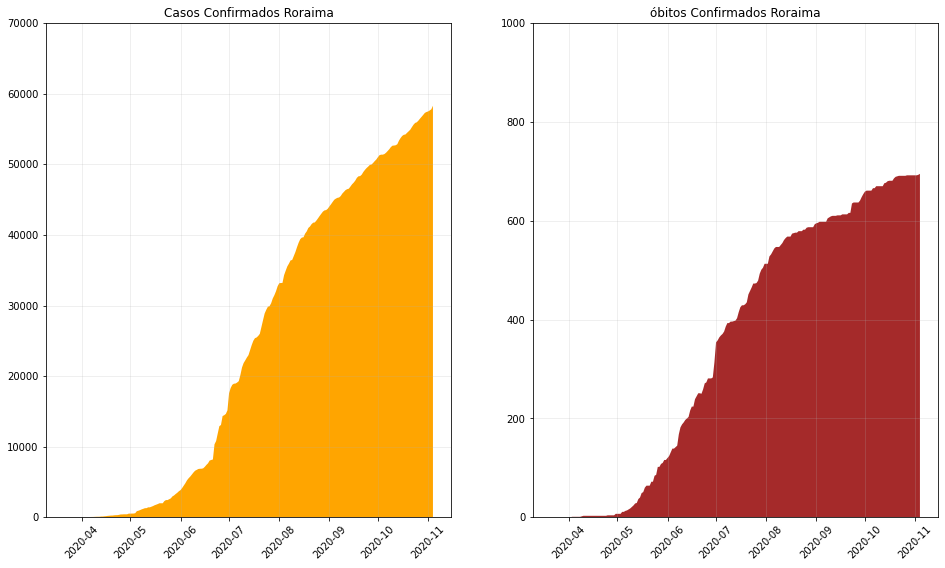

In [ ]:
dados_roraima = dados.drop(['order_for_place','estimated_population_2019',
                            'estimated_population','city_ibge_code',
                            'confirmed_per_100k_inhabitants','is_last','city'],axis=1)

estado_roraima = dados_roraima['state'] =='RR'
dados_roraima = dados_roraima[estado_roraima]
dados_roraima = dados_roraima.drop_duplicates('date',keep='first')
dados_roraima['date'] = pd.to_datetime(dados_roraima['date']).dt.date
dados_roraima = dados_roraima.sort_values(by='date')


plt.figure(figsize=(16,20))
plt.subplot(2,2,1)
plt.stackplot(dados_roraima['date'],dados_roraima['confirmed'],colors='orange')
plt.title("Casos Confirmados Roraima")
plt.grid(alpha=0.25)
plt.ylim(0,70000)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.stackplot(dados_roraima['date'],dados_roraima['deaths'],colors='brown')
plt.title("óbitos Confirmados Roraima")
plt.grid(alpha=0.25)
plt.ylim(0,1000)
plt.xticks(rotation=45)


plt.show()

>**Interpretação**: Podemos analisar que o estado ainda encontra-se em uma curva de crescimento, ultrapassando possívelmente em breve, a marca de 60 Mil casos confirmados. Nota-se que no gráfico de casos, que a partir do mês seis, o estado teve uma explosão de casos confirmados, logo depois, ao longo dos meses, realizando uma curva, que indicaria que estava chegando ao seu platô. Contudo, o estado vem passando por uma série de medidas de relaxamento,e isto pode estar contribuindo para o aumento do número destes casos. Quanto ao gráfico de Mortes, observa-se que o crescimento acentuou-se a partir de maio, e do mês de outubro até novembro (até o momento em que estes dados foram coletados), parece ter atingido seu platô, começando então até uma maior estabilidade no número de mortes, que já ultrapassaram a cada dos 800 mortos.

##Analisando um pouco o estado de SÃO PAULO (maior estado)
>Já olhamos rapidamente como o menor estado do país está sendo afetado pela covid-19. Vamos olhar então para o maior estado do Brasil.

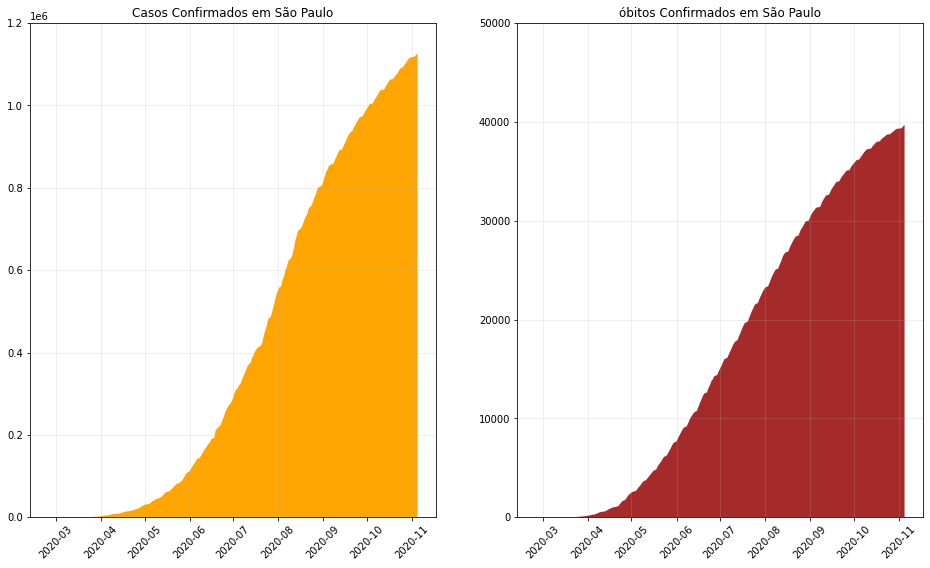

In [ ]:
dados_sp = dados.drop(['order_for_place','estimated_population_2019',
                            'estimated_population','city_ibge_code',
                            'confirmed_per_100k_inhabitants','is_last','city'],axis=1)

estado_sp = dados_sp['state'] =='SP'
dados_sp = dados_sp[estado_sp]
dados_sp = dados_sp.drop_duplicates('date',keep='first')
dados_sp['date'] = pd.to_datetime(dados_sp['date']).dt.date
dados_sp = dados_sp.sort_values(by='date')


plt.figure(figsize=(16,20))
plt.subplot(2,2,1)
plt.stackplot(dados_sp['date'],dados_sp['confirmed'],colors='orange')
plt.title("Casos Confirmados em São Paulo")
plt.grid(alpha=0.25)
plt.ylim(0,1200000)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.stackplot(dados_sp['date'],dados_sp['deaths'],colors='brown')
plt.title("óbitos Confirmados em São Paulo")
plt.grid(alpha=0.25)
plt.ylim(0,50000)
plt.xticks(rotation=45)


plt.show()

>**Interpretação**: Analisando mais de perto a curva de crescimento de casos em SP, notamos o quão crescente ela se encontra até o momento, mesmo estando em novembro. Ao longo dos meses, teve pequinas indicações de estabilização, tendo sua explosão de caso a partir de maior também, assim como analisado em Roraima. Notamos também que pela forma de sua curva, em breve poderá atingir seu limite e então começar a realizar a configuração de queda, mas isso depende, é claro, da responsabilidade de cada cidadão quanto a saúde sua, de seus familiares e de seus amigos. Quanto a curva de mortes, nota-se que ao que tudo indica, já entrou na fase de estabilização também, dado que sua curva acentuou-se muito de Setembro até outubro (lembrando mais uma vez que este dataset não possui o mês de novembro completo). A diferença entre os dados de SP com RR são discrepantes e mostram que independente do tamanho da população de cada UF, os padrões de curvatura se assemelham muito.

#Conclusão 
>Ao longo do ano,o Brasil, assim como o resto do mundo, enfretou e vem enfrentando todos os dias, um inimigo invisivel aos nossos olhos, que parece não fazer mal nenhum, dados sua taxa de mortes em comparação a outras doenças, mas que na realidades, demonstra ser um dos maiores desafios já enfrentados no século XXI. Nós analisamos perfeitamente o desenvolvimento da doença nos estados brasileiros. A evolução do número de casos em cada região, o percentual que foi variando de acordo com os estados,levando em conta aspectos socioculturais que requerem mais aprofundamento ainda, caso queiramos ter um entendimento mais profundo, mas que, só com que fora analisado aqui, já é assustador. Estudar estes dados, plotar gráficos, buscar entendimentos do porquê nos é mostrado, ajuda a compreender o problema em escalas que ultrapassam a ciência de dados, e nos gera conhecimentos que nem 1000 livros do tema seriam capazes de ensinar. Olhar de forma crua para o nosso dataset e dele buscar abstrair tudo que nos é dado é dificil, requer tempo experiência, e ainda por cima é um processo lento, mas com muito esforço e dedicação, conseguimos chegar lá.
Muito Obrigado(a) por ter acompanhado meus estudos até aqui e espero que tudo isso possa lhe ajudar de alguma forma.